In [2]:
import cv2
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
from app.utils.dataset import DepthDataset, create_data_loader
from models.UNetResNetDepth import UNetResNetDepth
from models.train_depth_model import train_model
from app.utils.env import Env
import matplotlib.pyplot as plt

In [28]:
env = Env()

image_size = 256
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
  transforms.ToTensor(),
])

target_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor()
])



In [29]:
train_dataset = DepthDataset(
    root_dir=env.dataset_path / "train",
    transform=transform,
    target_transform=target_transform,
)
val_dataset = DepthDataset(
    root_dir=env.dataset_path / "val",
    transform=transform,
    target_transform=target_transform,
)

c:\Users\mkami\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mkami\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/15


Validation: 100%|██████████| 87/87 [00:09<00:00,  8.73it/s]


Train Loss: 0.06159035411864628 | Val Loss: 0.06320840624579485
Epoch 2/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 35.63it/s]


Train Loss: 0.054657178542034314 | Val Loss: 0.06241788400903992
Epoch 3/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 33.18it/s]


Train Loss: 0.052524795452125995 | Val Loss: 0.06224052835849748
Epoch 4/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 41.26it/s]


Train Loss: 0.05105883605955612 | Val Loss: 0.062071685849324515
Epoch 5/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 30.62it/s]


Train Loss: 0.049942249698298316 | Val Loss: 0.06253960333440615
Epoch 6/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 37.33it/s]


Train Loss: 0.049006802681492365 | Val Loss: 0.06285613465352335
Epoch 7/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 36.33it/s]


Train Loss: 0.04815988985978531 | Val Loss: 0.0628589065178581
Epoch 8/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 36.24it/s]


Train Loss: 0.04744547297461675 | Val Loss: 0.062456532967263376
Epoch 9/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 36.73it/s]


Train Loss: 0.046779651849806966 | Val Loss: 0.062694226766842
Epoch 10/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 35.23it/s]


Train Loss: 0.046227689092166915 | Val Loss: 0.06267615586951159
Epoch 11/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 36.34it/s]


Train Loss: 0.04572033388164891 | Val Loss: 0.06280766328175863
Epoch 12/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 35.94it/s]


Train Loss: 0.045321473957554544 | Val Loss: 0.06325291321761366
Epoch 13/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 30.08it/s]


Train Loss: 0.04485203569325117 | Val Loss: 0.063437794710415
Epoch 14/15


Validation: 100%|██████████| 87/87 [00:02<00:00, 29.70it/s]


Train Loss: 0.0444755093075144 | Val Loss: 0.06368346969070642
Epoch 15/15


Validation: 100%|██████████| 87/87 [00:03<00:00, 28.49it/s]


Train Loss: 0.044122311528840344 | Val Loss: 0.06368452690649723


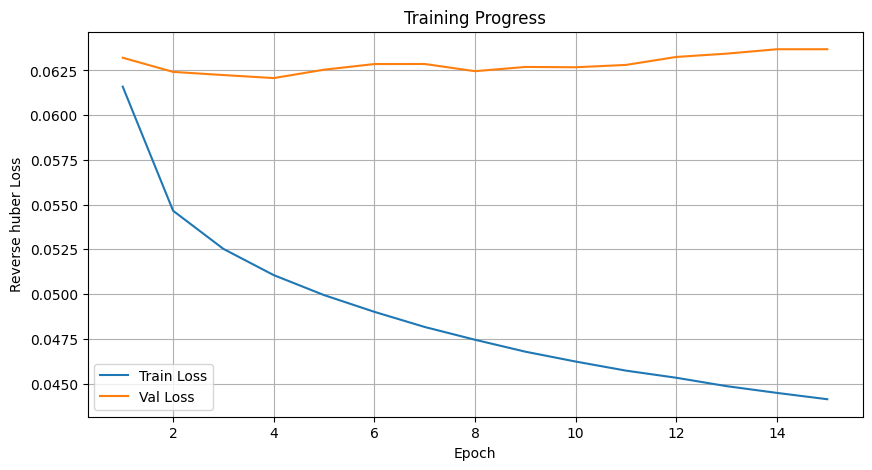

In [6]:

model = UNetResNetDepth()
train_loader = create_data_loader(train_dataset, batch_size=4)
val_loader = create_data_loader(val_dataset, batch_size=4, shuffle=False)

train_model(model, train_loader, val_loader, num_epochs=15)

In [9]:
train_dataset[0][0].shape

torch.Size([3, 256, 256])

In [ ]:
# save model
# torch.save(model.state_dict(), "depth_unet_15.pth")

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
# perform examplary inference
raw_image, depth_gt = train_dataset[0]  # raw_image and depth_gt are both tensors
raw_image = raw_image.unsqueeze(0).to(device)  # [1, 3, H, W]
depth_gt = depth_gt.squeeze().numpy()          # [H, W]

In [34]:
model.eval()
with torch.no_grad():
    prediction = model(raw_image)  # [1, 1, H, W]
    prediction = prediction.squeeze().cpu().numpy()  # [H, W]


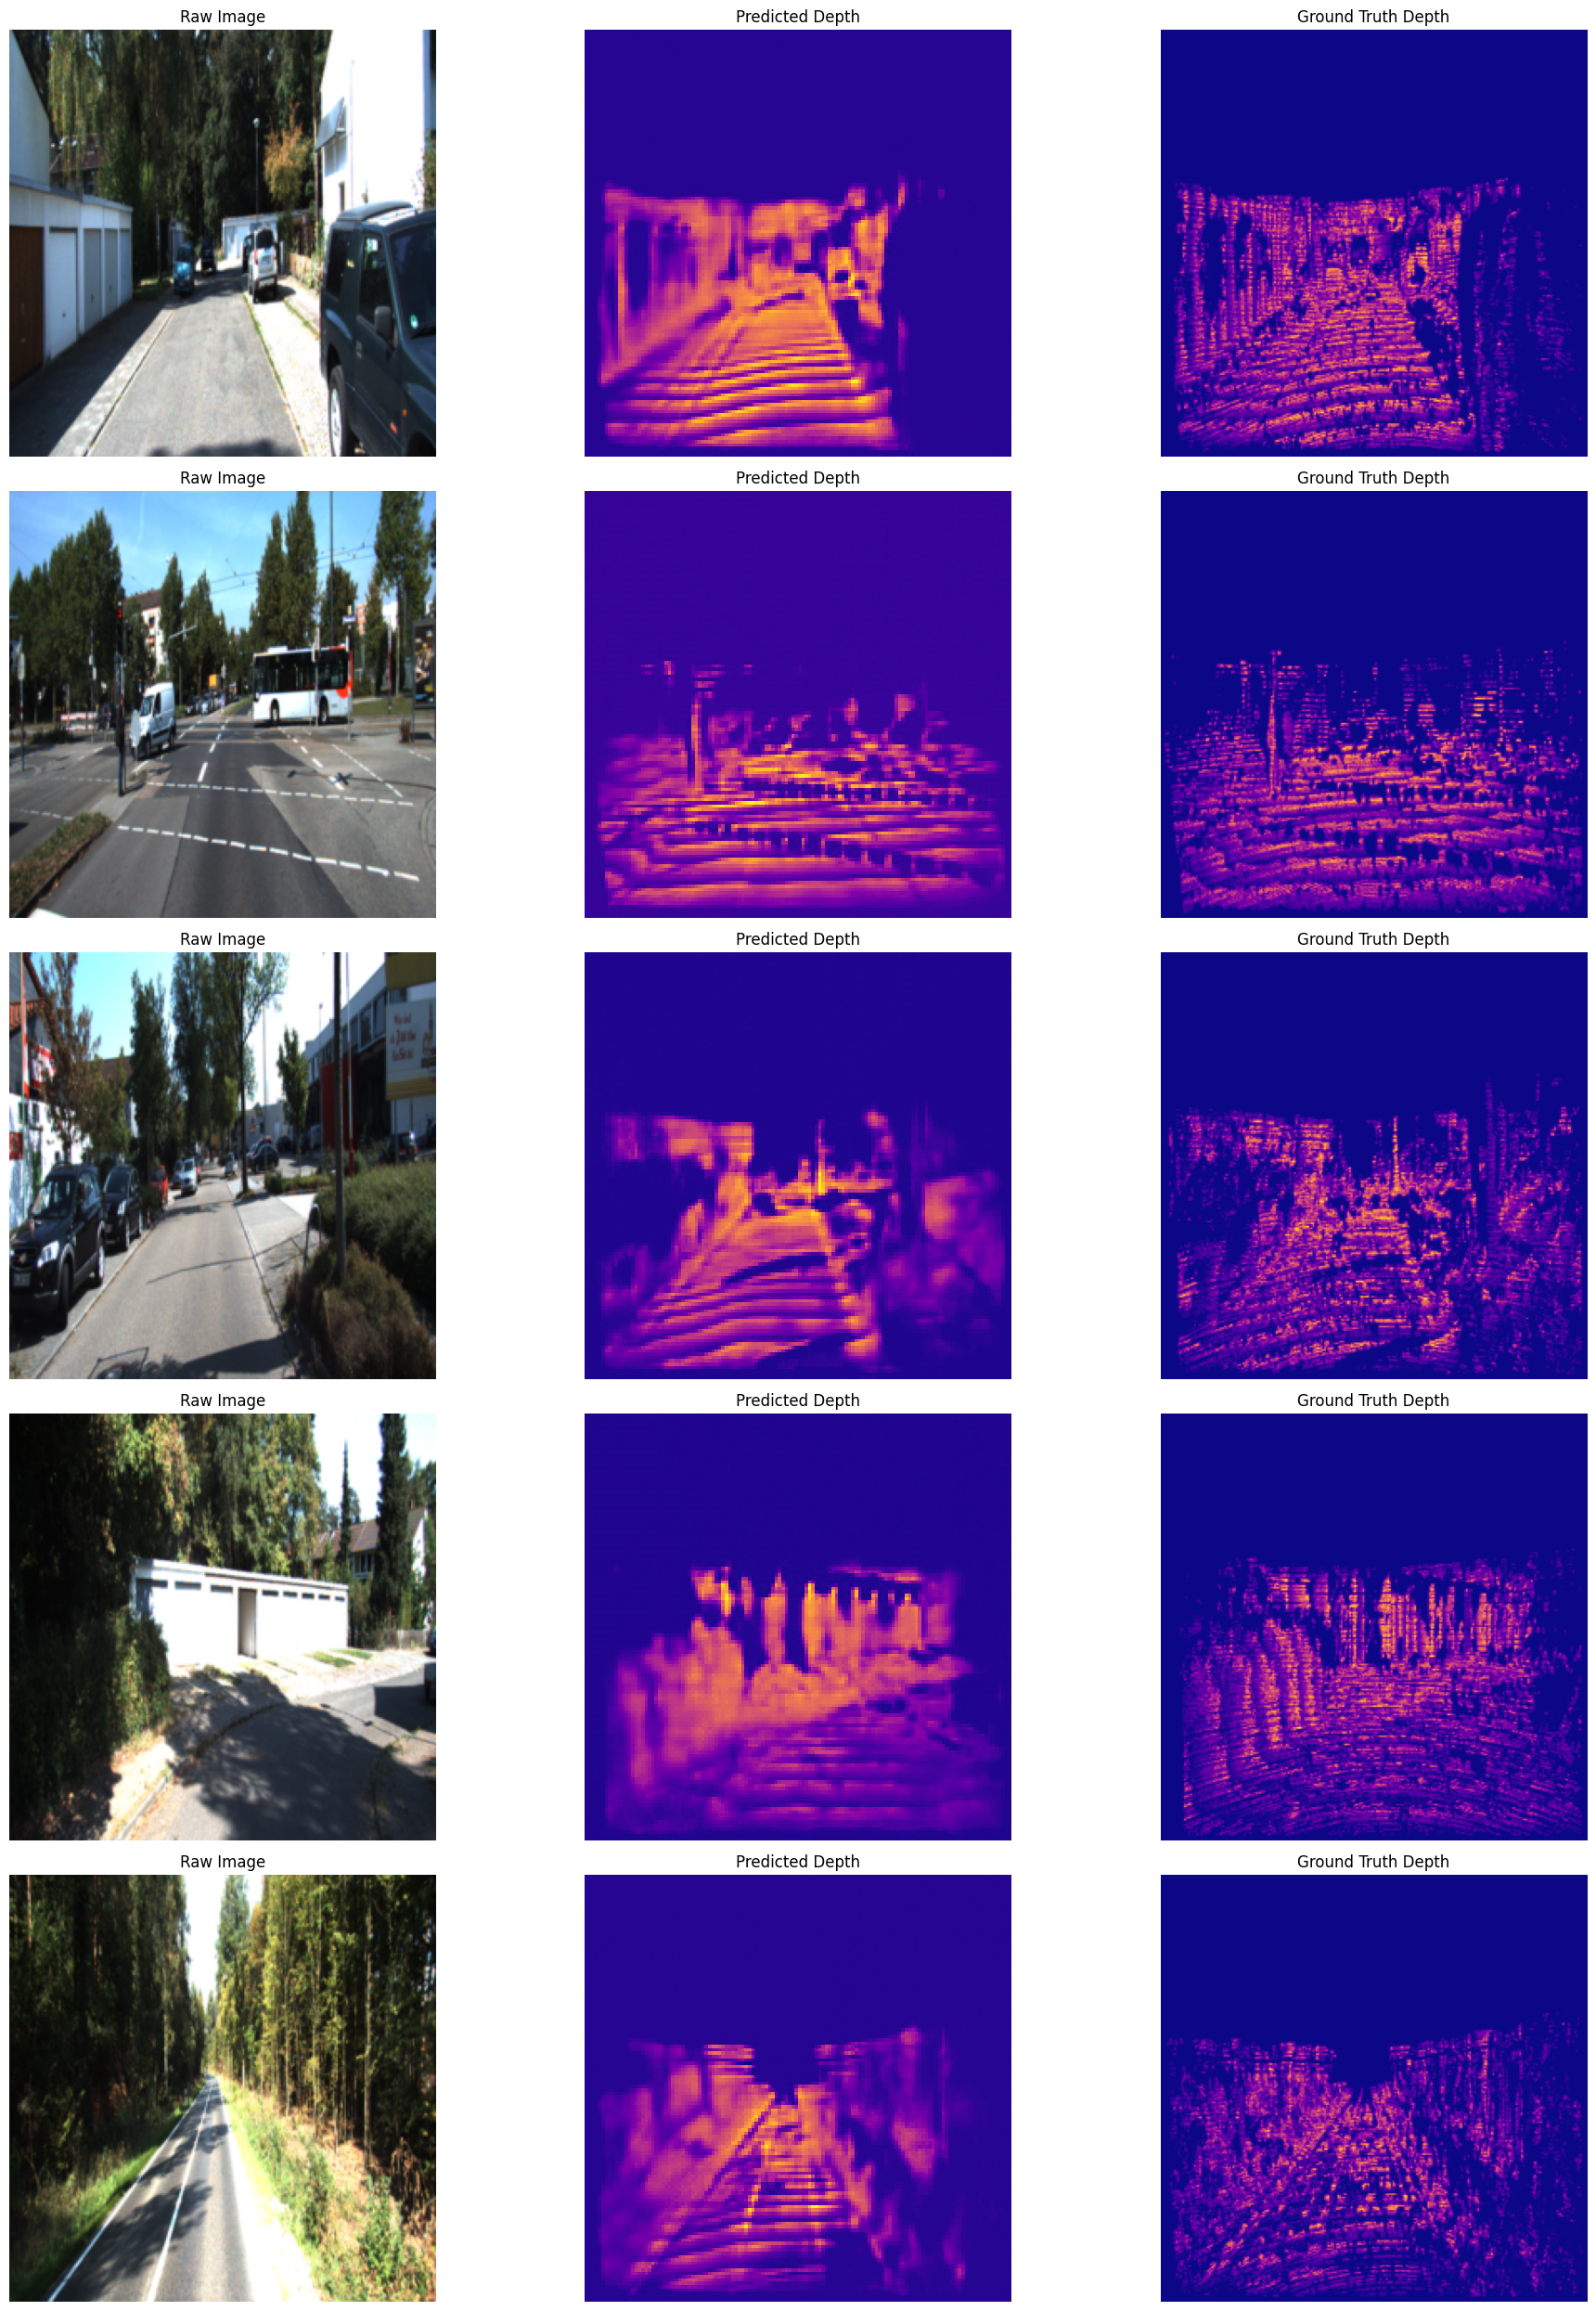

In [38]:
import random
random.seed(23)

num_examples = 5
fig = plt.figure(figsize=(20, 5*num_examples))

for i in range(num_examples):
    idx = random.randint(0, len(train_dataset)-1)
    raw_image, depth_image = train_dataset[idx]
    raw_image = raw_image.unsqueeze(0).to(device)  # [1, 3, H, W]
    with torch.no_grad():
        prediction = model(raw_image)
        prediction = prediction.squeeze().cpu().numpy()

    ax = fig.add_subplot(num_examples, 3, i*3+1)
    ax.imshow(raw_image.squeeze().permute(1, 2, 0).cpu(), cmap='plasma')
    ax.set_title("Raw Image")
    ax.axis('off')

    ax = fig.add_subplot(num_examples, 3, i*3+2)
    ax.imshow(prediction, cmap='plasma')
    ax.set_title("Predicted Depth")
    ax.axis('off')

    ax = fig.add_subplot(num_examples, 3, i*3+3)
    ax.imshow(depth_image.permute(1,2,0).numpy() * 255, cmap='plasma')
    ax.set_title("Ground Truth Depth")
    ax.axis('off')

plt.tight_layout()
plt.show()
